In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



### 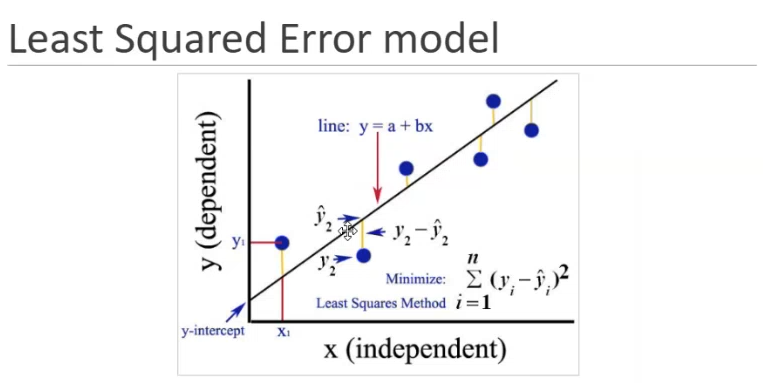

### Step1. Data Ingestion

In [47]:
path = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\50_Startups.csv"

In [48]:
import pandas as pd
st = pd.read_csv(path)

In [49]:
st.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2 Basic data quality checks 

# 1.Check info
# 2.check shape
# 3.Check Column Names
# 4.Check Missing Values if any handle them
# 5. Check for duplicate rows

In [50]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [51]:
st.shape

(50, 5)

In [52]:
st.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [53]:
st.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [54]:
st.duplicated().sum()

np.int64(0)

### Step 4. Separate X and Y
X = Independent Features Y = Dependent Feature

In [55]:
st.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [56]:
X = st[["RND","MKT"]]
Y = st[["PROFIT"]]

In [57]:
X.head()

,RND,MKT
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [58]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 5: Build a Model

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [60]:
model.intercept_

array([46975.86422072])

In [61]:
model.coef_

array([[0.79658404, 0.02990788]])

### Equation of line = B0 + B1.X + B2.X2 
PROFIT_PREDICTED = 46975.86 + 0.79*RND + 0.029*MKT

When RND and MKT are 0, PROFIT_PREDICTED = intercept

When RND increases by 1 nd MKT increases by 1, Y_Predicted will always increased by 0.82

In [63]:
st["MKT"].min()


np.float64(0.0)

## Step 6: Model Predictions

In [68]:
y_pred =  model.predict(X)
y_pred[:5]

array([[192800.45862502],
       [189774.65948019],
       [181405.37809703],
       [173441.30884249],
       [171127.62321762]])

In [93]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [91]:
model.score(X,Y)

0.9504503015559763

### Step 7: Evaluation Meetrics

Mean Squared Error

Root Mean Squared Error

Mean Absolute Error 

R2 Score - R Squared - Coeff of determination


In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [81]:
def evaluate(model):

    # calculate ypred data
    y_pred = model.predict(X)

    # calculate MSE
    mse = mean_squared_error(Y,y_pred)

    # Calculate RMSE
    rmse = mse**(1/2)

    # calculate MAE
    mae = mean_absolute_error(Y,y_pred)

    # Calculate R2 Score 
    r2 = r2_score(Y,y_pred)


    #print all the values 
    print(f"Mean Squared Error is {round(mse,2)}")
    print(f"Root Meab Squared Error is {round(rmse,2)}")
    print(f"Mean Absolute Error is {round(mae,2)}")
    print(f"R2 error is {round(r2*100,2)}%")

In [82]:
evaluate(model)

Mean Squared Error is 78887897.01
Root Meab Squared Error is 8881.89
Mean Absolute Error is 6499.32
R2 error is 95.05%


## Since model is providing an R2 score of more than 80%, we can consider this model for out of sample predictions

In [84]:
x = [15000, 175000]

In [88]:
y_pred1 = model.predict([x])
y_pred1

array([[64158.50304257]])